In [1]:
# Import libraries

import pandas as pd
import seaborn as sns 
import numpy as np

import matplotlib
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create 

# Read in the data

df = pd.read_csv(r'C:\Users\Carlos\Desktop\Correlation in Python\movies.csv')

In [11]:
# Looking at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [6]:
# Checking if there's any missing data 

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))
    

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [30]:
# Data types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        Int64
gross         Int64
company      object
runtime     float64
dtype: object

In [29]:
# Changing data type of some columns to make more sense of them
# Note: I had to capitalize 'int64' in order for this to work

df['budget'] = pd.to_numeric(df['budget'], errors = 'coerce')
df['budget'] = df['budget'].astype('Int64')

df['gross'] = pd.to_numeric(df['gross'], errors = 'coerce')
df['gross'] = df['gross'].astype('Int64')


In [31]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        Int64
gross         Int64
company      object
runtime     float64
dtype: object

In [33]:
# Sorting the data from highest grossing picture to lowest
df = df.sort_values(by = ['gross'], inplace = False, ascending = False)

In [56]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


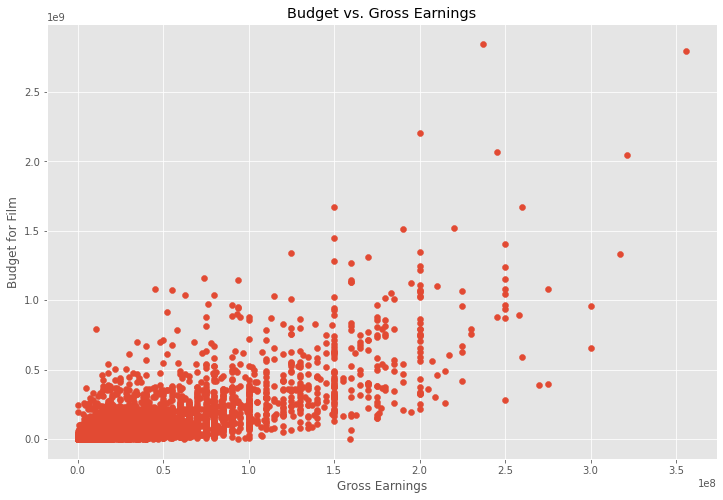

In [52]:
# Scatter plot budget vs gross 
plt.scatter(x = df['budget'], y = df['gross'])
plt.title('Budget vs. Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

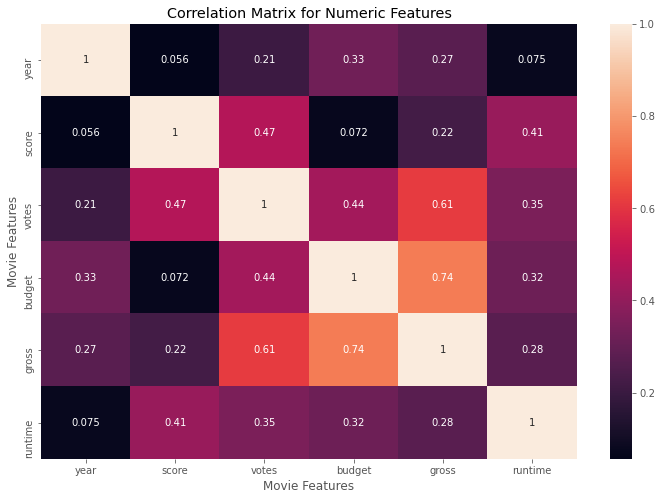

In [55]:
correlation_matrix = df.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation Matrix for Numeric Features")

plt.xlabel("Movie Features")

plt.ylabel("Movie Features")

plt.show()

# We can see that budget vs gross shows the highest correlation, closely followed by votes vs gross
# However, we can still apply a factorization to non-numerical categories to have a deeper look at the general correlation


In [53]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,0.314800,0.186668,0.267282,0.667784,0.136453,0.608411,0.679807,0.764057,0.599409,0.124405,0.526690,0.986431,0.631721,0.089567
rating,0.314800,1.000000,0.031419,0.096638,0.241252,-0.075109,0.121122,0.230190,0.251470,0.226006,0.111309,0.283770,0.319778,0.269792,0.029208
genre,0.186668,0.031419,1.000000,0.075279,0.115080,0.047421,0.177836,0.131437,0.129595,0.143735,-0.055109,0.175071,0.185075,0.080643,0.011329
year,0.267282,0.096638,0.075279,1.000000,0.359790,0.045163,0.286895,0.186505,0.231664,0.240670,-0.047325,0.190333,0.277721,0.136096,0.037011
released,0.667784,0.241252,0.115080,0.359790,1.000000,0.099607,0.481682,0.478949,0.541156,0.439566,0.095519,0.396935,0.677897,0.410408,0.058182
score,0.136453,-0.075109,0.047421,0.045163,0.099607,1.000000,0.247863,0.176117,0.122357,0.139127,-0.057087,-0.005767,0.139819,0.022732,0.057866
votes,0.608411,0.121122,0.177836,0.286895,0.481682,0.247863,1.000000,0.472671,0.522918,0.429085,0.013363,0.317842,0.620450,0.346864,0.088525
director,0.679807,0.230190,0.131437,0.186505,0.478949,0.176117,0.472671,1.000000,0.642875,0.504992,0.123672,0.443151,0.692902,0.528071,0.084943
writer,0.764057,0.251470,0.129595,0.231664,0.541156,0.122357,0.522918,0.642875,1.000000,0.510628,0.138299,0.449523,0.776528,0.532013,0.066645
star,0.599409,0.226006,0.143735,0.240670,0.439566,0.139127,0.429085,0.504992,0.510628,1.000000,0.106459,0.457442,0.612142,0.455444,0.096652


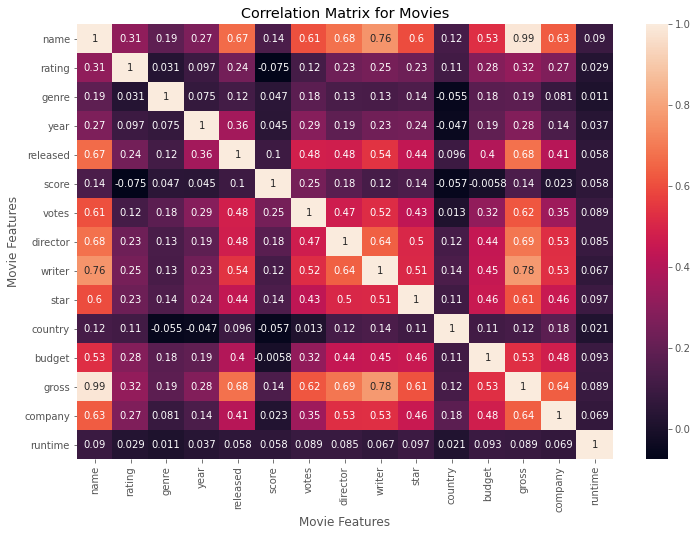

In [54]:
# Correlation Matrix for all Categories

correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation Matrix for Movies")

plt.xlabel("Movie Features")

plt.ylabel("Movie Features")

plt.show()

# Now we can see that there are more interesting correlations:
# For instance:
# We can see that the gross of a film is highly correlated with its name, showing corr = 0,99
# Also, the gross is highly correlated with the writer of the film with corr = 0,78, meaning that there are writers that
# pull in a lot ot spectators
# The same goes for gross vs director, gross vs star and gross vs released with corr > 0,60 
# which means that most people care about who directs and stars in films and the time of the year the film is released

# In contrast:
# The correlation matrix shows that the runtime of a film has the lowest correlation vs the gross of a film 
# with corr = 0,089, followed very closely by the country the film is made in and the score.
# This means that most people don't pay attention to the length of a film, where it's made in and the score it gets
# after it's released



In [57]:
# Looking at the top 15 companies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 54610959970
Universal Pictures           51241105418
Columbia Pictures            42356430218
Paramount Pictures           40021704691
Twentieth Century Fox        39542573303
Walt Disney Pictures         35833650748
New Line Cinema              19612851164
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Dreamworks Pictures          11593807697
Touchstone Pictures          10664679494
Metro-Goldwyn-Mayer (MGM)     8937010092
Summit Entertainment          8318570396
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7243673721
Name: gross, dtype: int64

In [58]:
# Looking at the top 15 directors by gross revenue

DirectorGrossSum = df.groupby('director')[["gross"]].sum()

DirectorGrossSumSorted = DirectorGrossSum.sort_values('gross', ascending = False)[:15]

DirectorGrossSumSorted = DirectorGrossSumSorted['gross'].astype('int64') 

DirectorGrossSumSorted

director
Steven Spielberg     9629049370
Anthony Russo        6844248984
Peter Jackson        6618045788
Michael Bay          6451692798
James Cameron        6248088578
Christopher Nolan    5153547948
David Yates          5044548416
J.J. Abrams          4659375464
Tim Burton           4456348890
Ron Howard           4388092562
Jon Favreau          4364675953
Robert Zemeckis      4286713824
Ridley Scott         4006715694
Chris Columbus       3969413348
Roland Emmerich      3868662044
Name: gross, dtype: int64

In [59]:
# Looking at the top 15 films by gross revenue

NameGrossSum = df.groupby('name')[["gross"]].sum()

NameGrossSumSorted = NameGrossSum.sort_values('gross', ascending = False)[:15]

NameGrossSumSorted = NameGrossSumSorted['gross'].astype('int64') 

NameGrossSumSorted

name
Avatar                                          2847246203
Avengers: Endgame                               2797501328
The Lion King                                   2754448457
Titanic                                         2201647264
Star Wars: Episode VII - The Force Awakens      2069521700
Avengers: Infinity War                          2048359754
Beauty and the Beast                            1689402145
Jurassic World                                  1670516444
Aladdin                                         1554744172
The Avengers                                    1542200454
Furious 7                                       1515341399
Frozen II                                       1450026933
Avengers: Age of Ultron                         1402809540
Black Panther                                   1347597973
Harry Potter and the Deathly Hallows: Part 2    1342321665
Name: gross, dtype: int64

In [61]:
# Looking at the top 15 writers by gross revenue

WriterGrossSum = df.groupby('writer')[["gross"]].sum()

WriterGrossSumSorted = WriterGrossSum.sort_values('gross', ascending = False)[:15]

WriterGrossSumSorted = WriterGrossSumSorted['gross'].astype('int64') 

WriterGrossSumSorted

writer
Christopher Markus    7587181621
James Cameron         6282146001
John Lasseter         4656539205
Chris Morgan          4360332296
J.K. Rowling          4152832057
Ehren Kruger          4103317806
Cinco Paul            3911673594
Ted Elliott           3727154056
Fran Walsh            3710456904
Lawrence Kasdan       3438708276
Melissa Rosenberg     3359900753
Steve Kloves          3197928553
Bruce Geller          3173171913
Michael Crichton      3131710554
Jeff Nathanson        3075820456
Name: gross, dtype: int64

In [62]:
# Looking at the top 15 stars by gross revenue

StarGrossSum = df.groupby('star')[["gross"]].sum()

StarGrossSumSorted = StarGrossSum.sort_values('gross', ascending = False)[:15]

StarGrossSumSorted = StarGrossSumSorted['gross'].astype('int64') 

StarGrossSumSorted

star
Robert Downey Jr.    11855937746
Tom Hanks             9899944903
Tom Cruise            9440309875
Will Smith            7947279234
Johnny Depp           7410125354
Daniel Radcliffe      6971268037
Leonardo DiCaprio     6963367648
Vin Diesel            6036312568
Dwayne Johnson        5711270624
Bruce Willis          5318951036
Chris Pratt           5278456138
Ben Stiller           5246015011
Adam Sandler          4949566857
Harrison Ford         4897078169
Daisy Ridley          4480695234
Name: gross, dtype: int64